<a href="https://www.kaggle.com/code/ayushashtikar/houseprices?scriptVersionId=157014555" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **House Prises Prediction**|

![](https://images.pexels.com/photos/1642125/pexels-photo-1642125.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


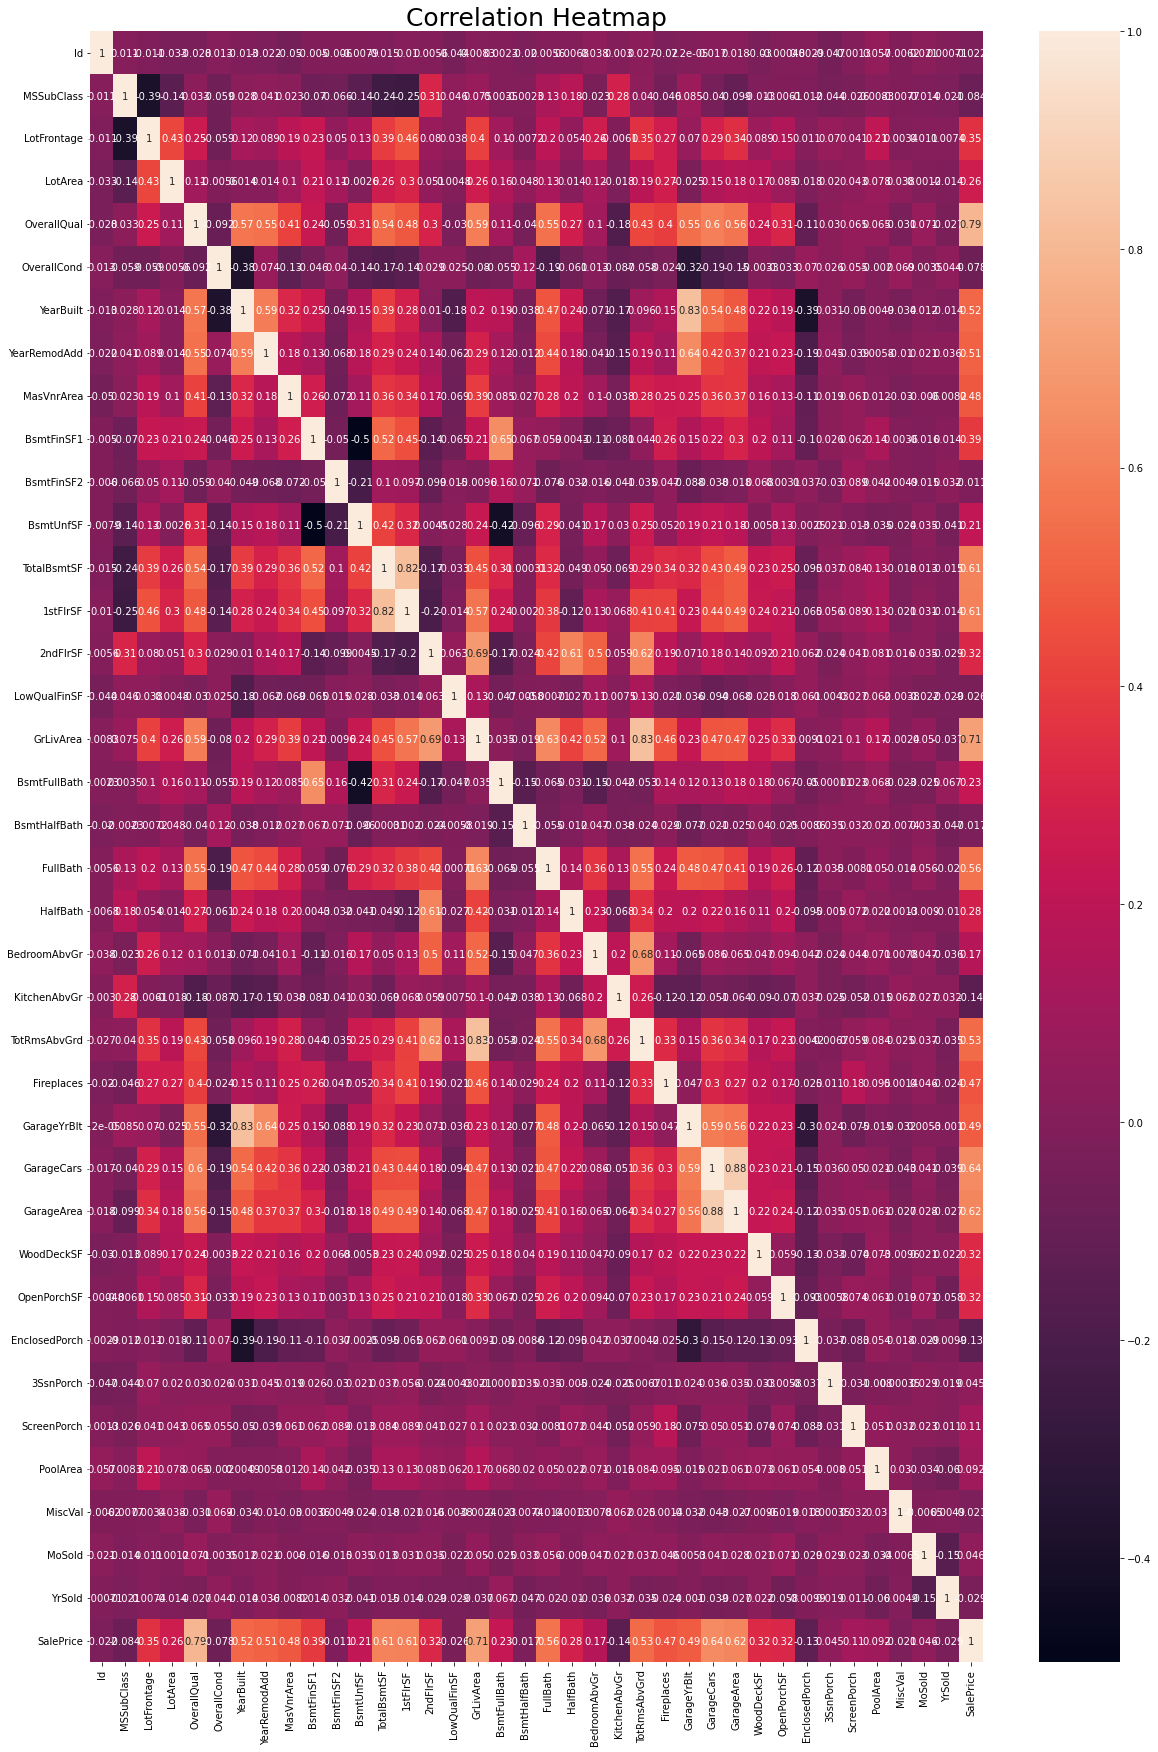

In [4]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap", fontsize=25)
plt.show()

In [5]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50)|(df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

important_columns = important_num_cols + cat_cols

df = df[important_columns]

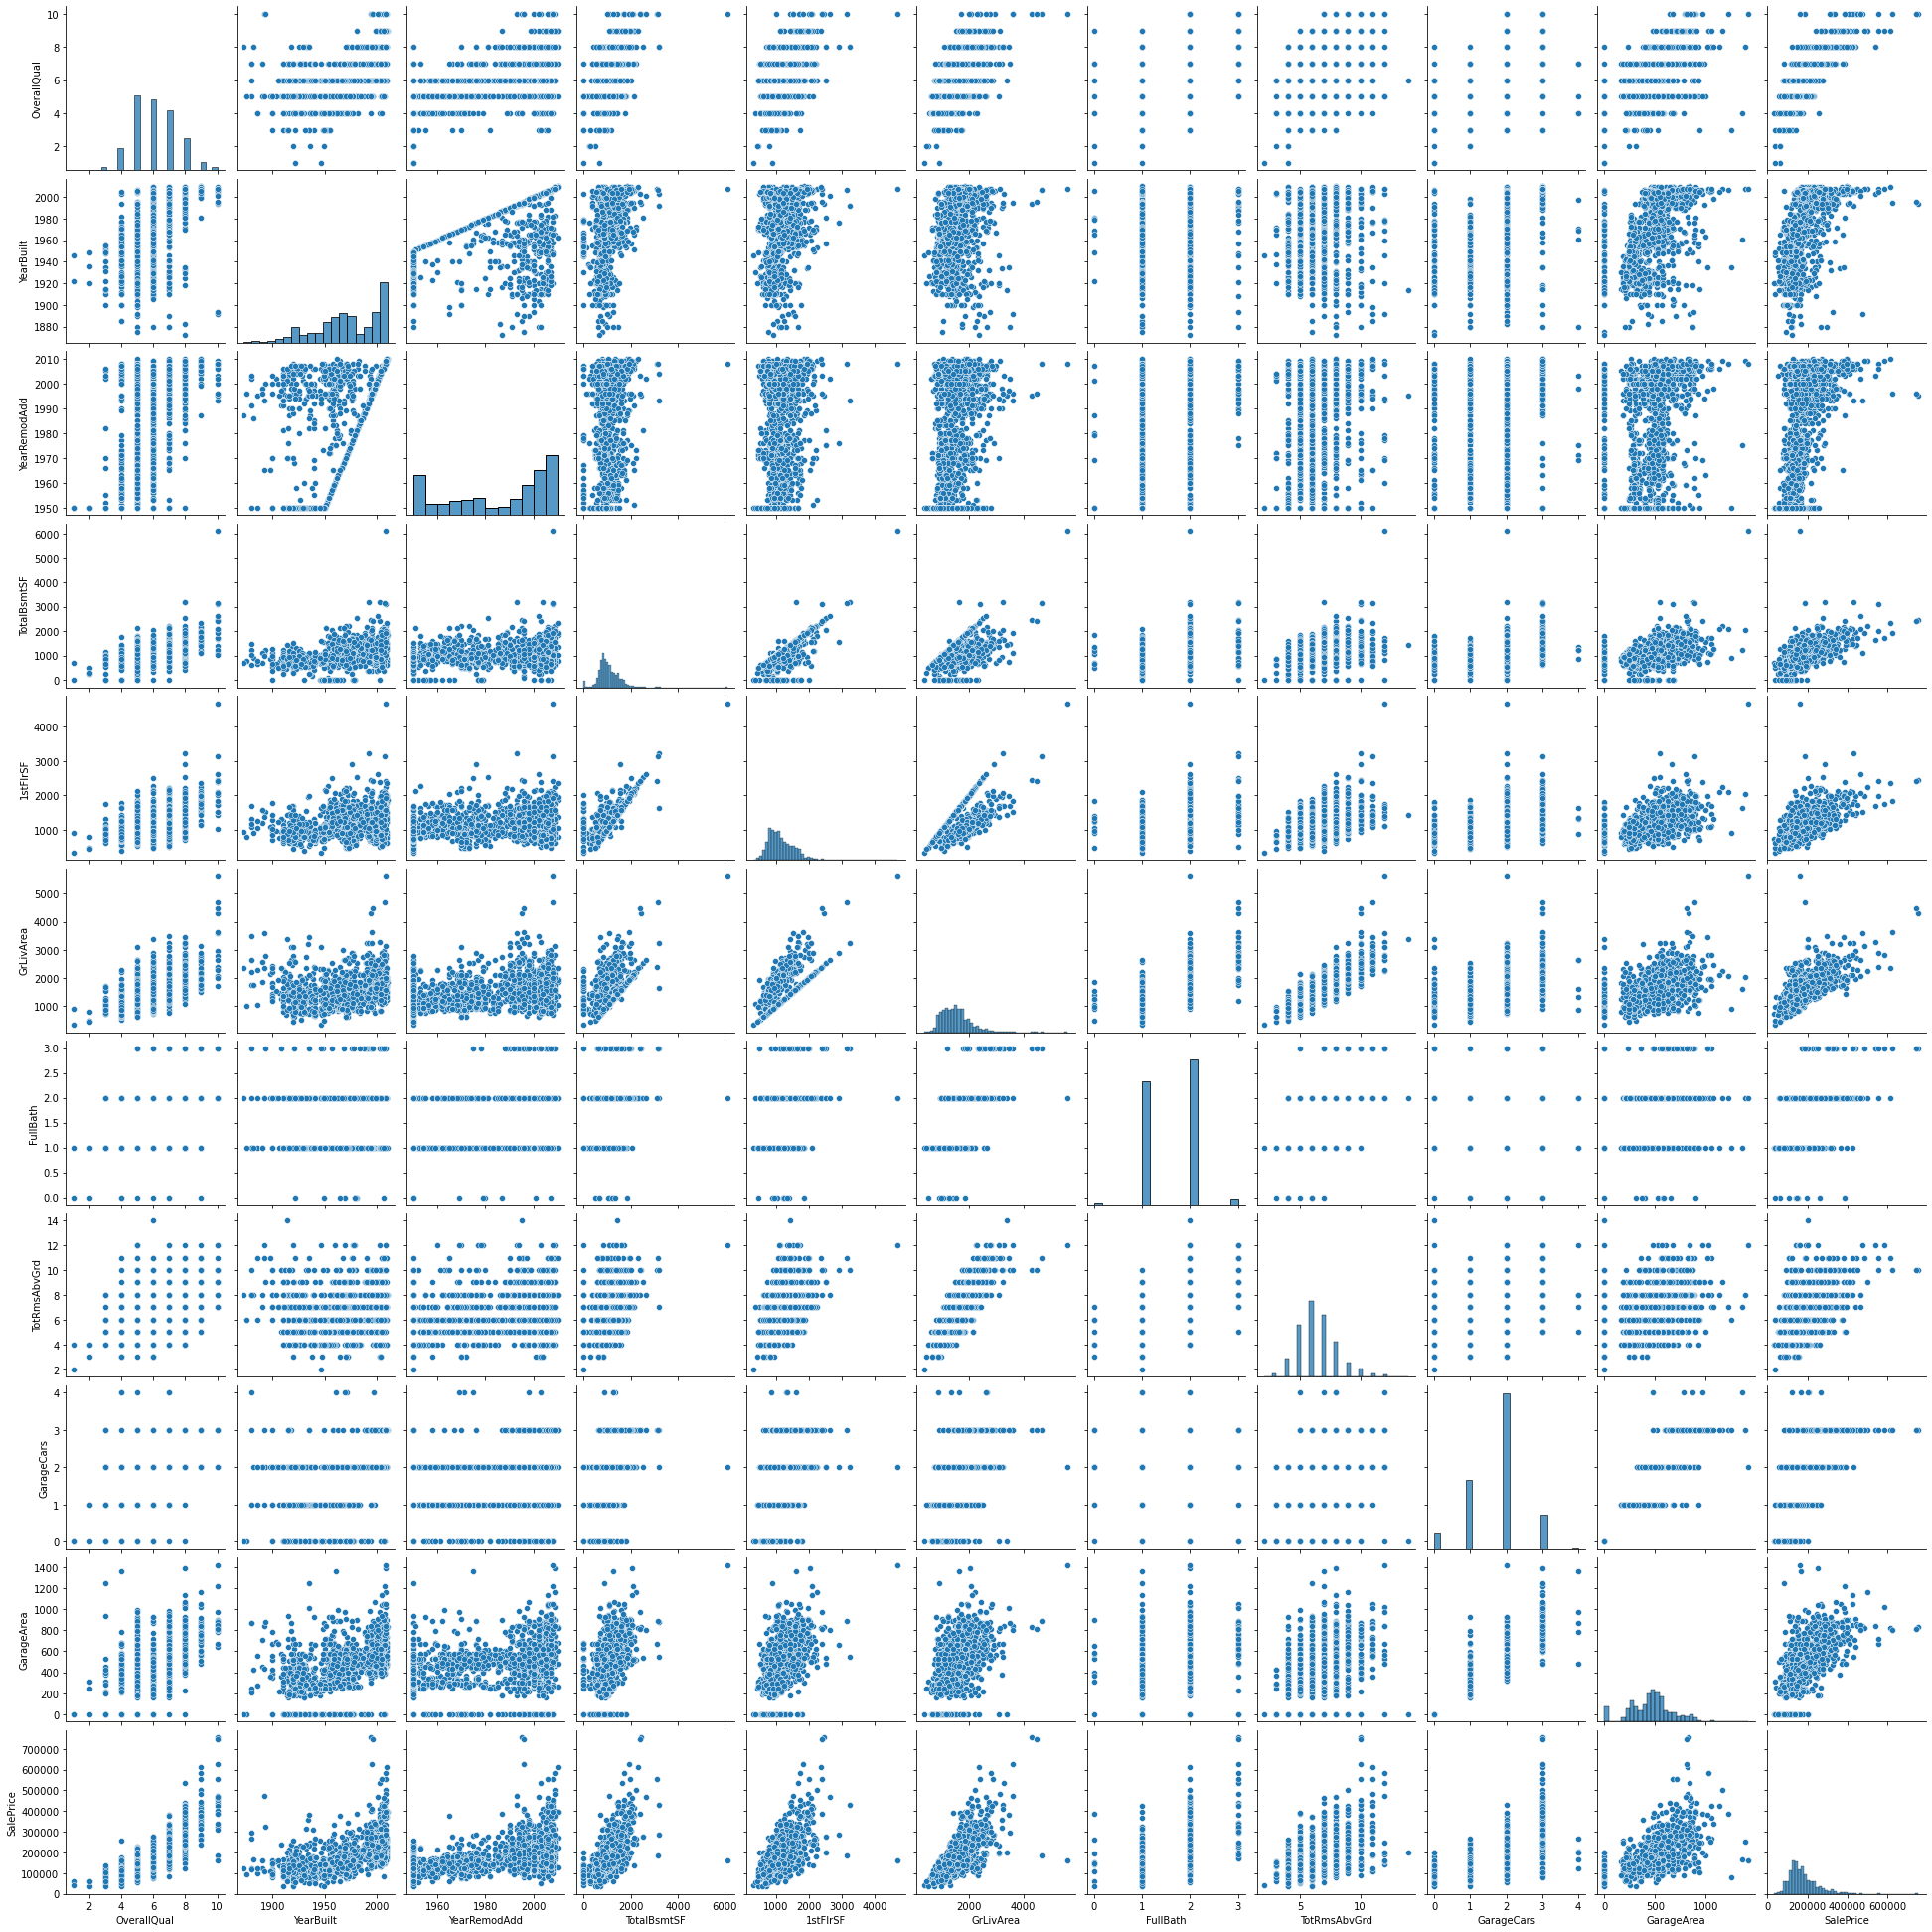

In [6]:
sns.pairplot(df[important_num_cols])

### Splitting X and Y

In [7]:
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

### One Hot Encoding

In [8]:
x = pd.get_dummies(x, columns=cat_cols)

### Standerdizing the data

In [9]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
x[important_num_cols] = scaler.fit_transform(x[important_num_cols])

### Train test Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# LinearRegression

In [11]:
#fitting and testing LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

#Getting Residuals
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("mae=", mae)
print("mse=", mse)
print("rmse=", rmse)
print("r2=", r2)
# mae, mse,rmse, r2

mae= 23567.890565943395
mse= 1414931404.6297863
rmse= 37615.57396384889
r2= 0.8155317822983865


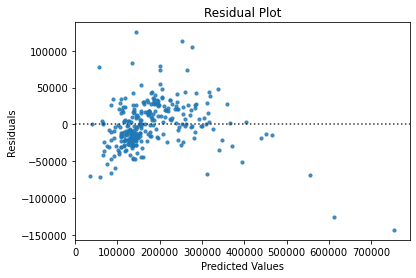

In [12]:
sns.residplot(x=y_test, y=pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# RidgeRegression

In [13]:
ridge = Ridge()
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)

#Getting Residuals
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("mae=", mae)
print("mse=", mse)
print("rmse=", rmse)
print("r2=", r2)
# mae, mse,rmse, r2

mae= 23435.50371200822
mse= 1404264216.8595588
rmse= 37473.513537691644
r2= 0.8169224907874508


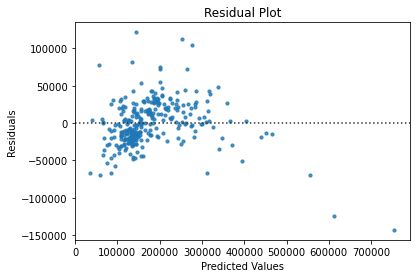

In [14]:
sns.residplot(x=y_test, y=pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# LassoRegression

In [15]:
lasso = Lasso()
lasso.fit(X_train,y_train)
pred = lasso.predict(X_test)

#Getting Residuals
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("mae=", mae)
print("mse=", mse)
print("rmse=", rmse)
print("r2=", r2)


mae= 23560.45808027236
mse= 1414337628.502095
rmse= 37607.680445649596
r2= 0.815609194407292


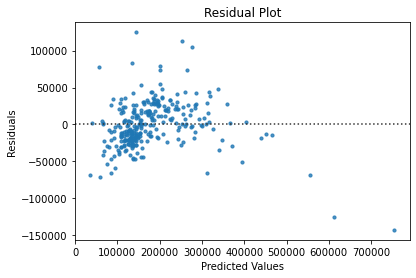

In [16]:
sns.residplot(x=y_test, y=pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# ElasticNetRegression

In [17]:
enr = ElasticNet()
enr.fit(X_train,y_train)
pred = enr.predict(X_test)

#Getting Residuals
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("mae=", mae)
print("mse=", mse)
print("rmse=", rmse)
print("r2=", r2)

mae= 23792.743784996732
mse= 1718445790.1371393
rmse= 41454.14080809225
r2= 0.775961837382229


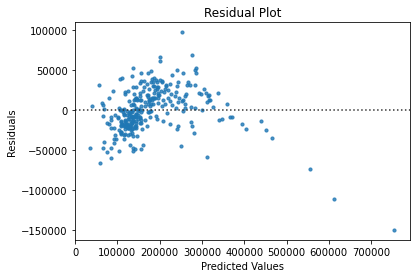

In [18]:
sns.residplot(x=y_test, y=pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# SVM

In [19]:
svr = SVR(C=100000)
svr.fit(X_train,y_train)
pred = svr.predict(X_test)

#Getting Residuals
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("mae=", mae)
print("mse=", mse)
print("rmse=", rmse)
print("r2=", r2)

mae= 17843.16228084975
mse= 1132136370.3413324
rmse= 33647.23421533087
r2= 0.8524004925265739


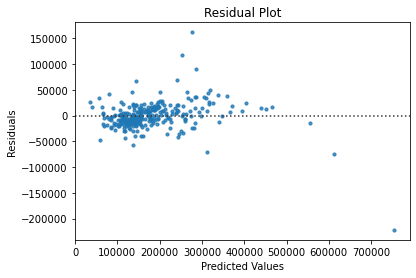

In [20]:
sns.residplot(x=y_test, y=pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()